In [106]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from sklearn.cluster import kmeans_plusplus
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift, estimate_bandwidth
from time import time

### Comment
Load the IRIS dataset from a CSV file.

Extract the first four columns from the dataset
and assign them to the variable x as a numpy array

In [107]:
iris = pd.read_csv("IRIS.csv")
X_iris = iris.iloc[:, [0, 1, 2, 3]].values

Print out information about the iris dataframe<br>
Print out the first 10 rows of the iris dataframe

In [108]:
iris.info()
iris[0:10]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In this code, the iris dataframe is filtered to create three new dataframes: `iris_setosa`, `iris_virginica`, and `iris_versicolor`. <br> Each of these dataframes contains only the rows from the original iris dataframe that have a specific value in the "species" column.

In [109]:
iris_setosa=iris.loc[iris["species"]=="Iris-setosa"]
iris_virginica=iris.loc[iris["species"]=="Iris-virginica"]
iris_versicolor=iris.loc[iris["species"]=="Iris-versicolor"]

Create a FacetGrid object with the iris dataframe and the "species" column as the hue. Map a histogram plot of the "petal_length" column to the FacetGrid object. Add a legend to the plot

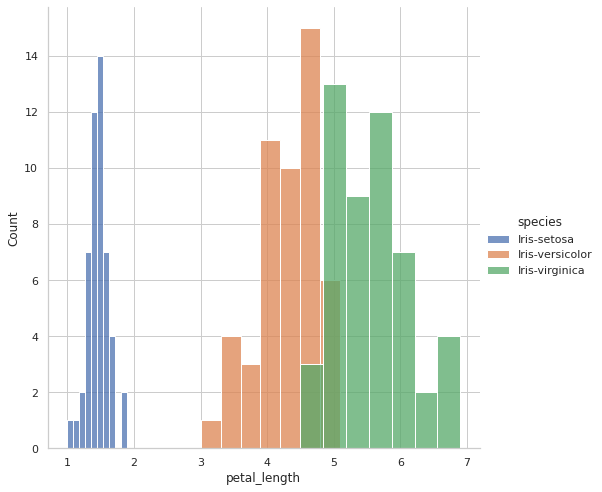

In [110]:
sns.FacetGrid(iris,hue="species",height=7).map(sns.histplot,"petal_length").add_legend()
plt.show()

Create a FacetGrid object with the iris dataframe and the "species" column as the hue. Map a histogram plot of the "petal_width" column to the FacetGrid object. Add a legend to the plot

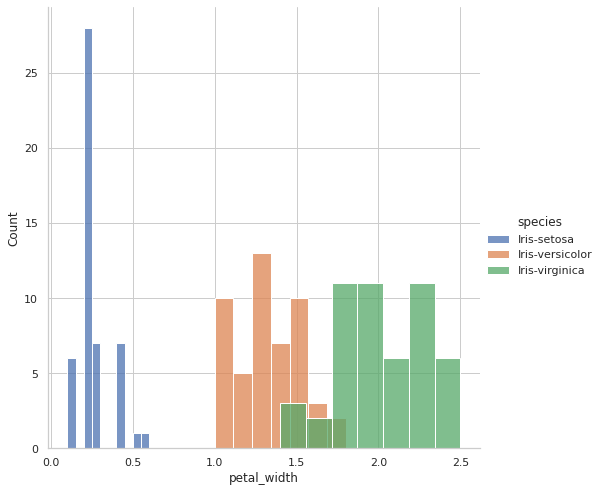

In [111]:
sns.FacetGrid(iris,hue="species",height=7).map(sns.histplot,"petal_width").add_legend()
plt.show()

Create a FacetGrid object with the iris dataframe and the "species" column as the hue. Map a histogram plot of the "sepal_length" column to the FacetGrid object. Add a legend to the plot

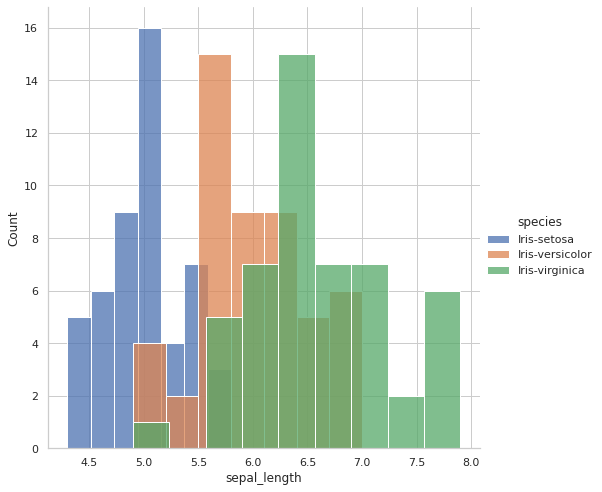

In [112]:
sns.FacetGrid(iris,hue="species",height=7).map(sns.histplot,"sepal_length").add_legend()
plt.show()

Create a pairplot of the iris dataset, with the "species" column used to color the points in the scatter plots.
<br>Set the style of the plots to a white grid.Create a pairplot of the iris dataframe with the "species" column as the hue. 

<br> The `sns.pairplot` function creates a matrix of scatter plots, with each column and row in the matrix representing a different variable in the dataset. <br> The `hue` parameter tells the function to color the points in the scatter plots based on the values in the "species" column.
<br> The `height` parameter sets the height of the figure. 

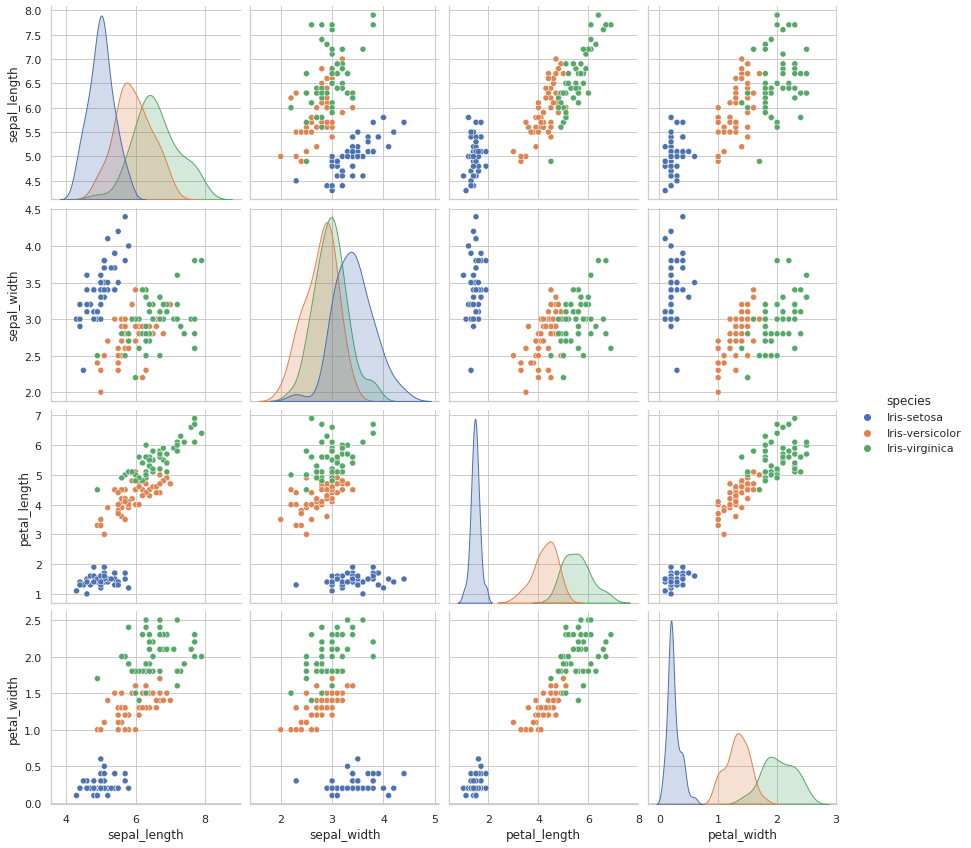

In [113]:
sns.set_style("whitegrid")
sns.pairplot(iris,hue="species",height=3)
plt.show()

The `k-means` algorithm is a popular and simple method for partitioning a dataset into clusters. It is an iterative algorithm that starts by randomly initializing the cluster centers, and then proceeds to assign each data point to the nearest cluster center. Once all points have been assigned, the cluster centers are updated to be the mean of the points in the cluster. This process is repeated until the cluster centers stop changing or a maximum number of iterations is reached.

One of the main advantages of `k-means` clustering is its computational efficiency. The algorithm has a linear time complexity with respect to the number of data points and the number of clusters, making it suitable for large datasets. However, the algorithm can be sensitive to the initial placement of the cluster centers, and it may converge to a local minimum rather than the global minimum of the WCSS. To mitigate this issue, the algorithm can be run multiple times with different initializations, and the best solution can be chosen based on the WCSS.

The number of clusters, `k` is a hyperparameter of the `k-means` algorithm, and it needs to be specified in advance. There are several methods for determining the optimal value of `k`, such as the elbow method, the silhouette method, or the gap statistic.

`k-means` clustering can be used for various applications, such as data compression, anomaly detection, or clustering similar items together. It is a simple and effective method for partitioning a dataset into clusters, and it is widely used in practice.

<br>

This code uses the `KMeans` algorithm from the sklearn library to perform k-means clustering on the `X_iris` array, which contains the first four columns of the iris dataset. The code is trying to find the optimum number of clusters for the k-means classification by creating and fitting a KMeans model for each value of i in the range 1 to 11.

`WCSS` - Create an empty list to store the Within Cluster Sum of Squares (WCSS) for each model

The `kmeans.inertia_` attribute returns the WCSS for the model, which is the sum of the squared distances between the points and their closest cluster center. This value is appended to the wcss list for each model.

The `WCSS` is often used as a measure of how "tight" the clusters are, and finding the number of clusters that gives the smallest WCSS is a common method for determining the optimal number of clusters for the k-means algorithm.

In [114]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X_iris)
    wcss.append(kmeans.inertia_)

In [115]:
kmeans.inertia_

26.04820224804435

This code creates a line plot of the WCSS values stored in the wcss list against the number of clusters.

This type of plot is often referred to as an `elbow plot`, because the optimal number of clusters is often found at the "elbow" of the plot, where the WCSS starts to level off. In this case, the optimal number of clusters is the number of clusters where the WCSS starts to decrease at a slower rate.

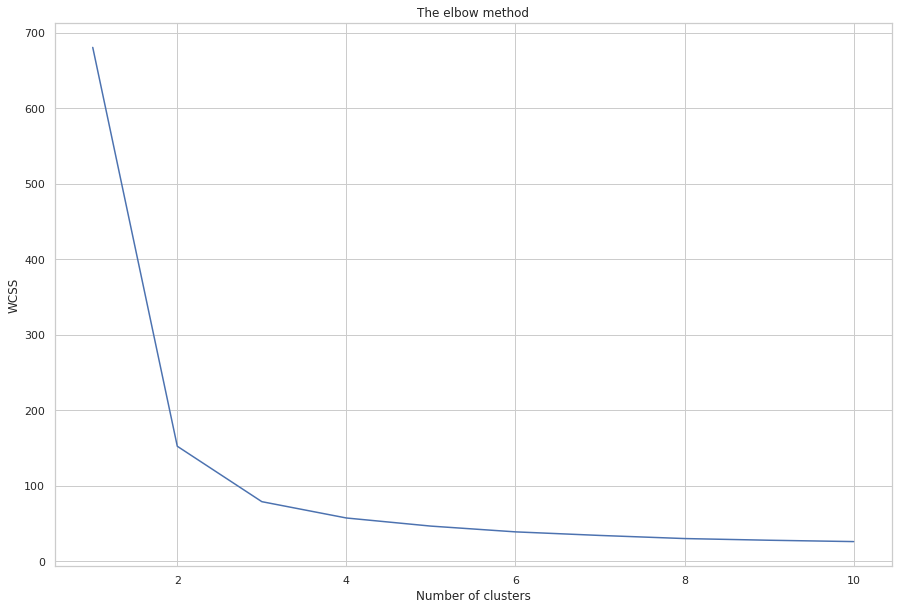

In [116]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

This code creates a `KMeans` model with 3 clusters and fits the model to the `X_iris` array using the `fit_predict` method. The `fit_predict` method fits the model to the data and returns the cluster labels for each sample in the data.


The `kmeans.fit_predict` method fits the model to the data and returns an array of cluster labels, with each label indicating the cluster that the corresponding sample belongs to. The cluster labels are assigned to the `y_kmeans` variable.

In [117]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(X_iris)

This code creates a scatter plot of the `X_iris` array and uses the cluster labels stored in `y_kmeans` to color the points in the plot. It also plots the centroids of the clusters using the `cluster_centers_` attribute of the kmeans model. 

The `y_kmeans == 0` notation creates a boolean array indicating which rows of `X_iris` belong to cluster 0, and the `X_iris[y_kmeans == 0, 0]` notation selects the first column of these rows. This is repeated for the other clusters and columns.

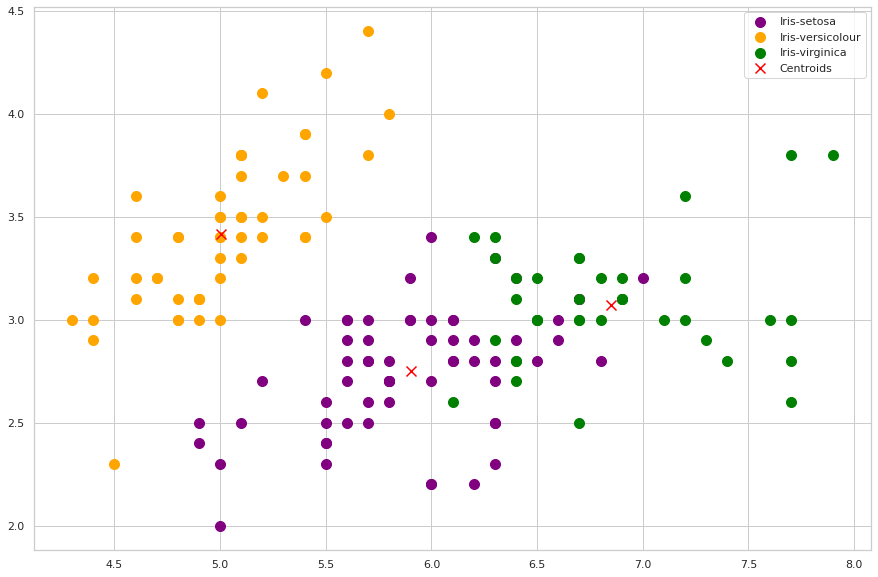

In [118]:
plt.scatter(X_iris[y_kmeans == 0, 0], X_iris[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(X_iris[y_kmeans == 1, 0], X_iris[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(X_iris[y_kmeans == 2, 0], X_iris[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids', marker="x")

plt.legend()
plt.show()

### I decided to show another example of k-means clustering algorithm:

This code uses the k-means algorithm to quantize an image, that is, to reduce the number of colors in the image while minimizing the loss of visual quality. The code loads an image, converts it to a 2D array of floating point values in the range [0, 1], and then uses the KMeans class from the sklearn.cluster module to cluster the pixels of the image into n_colors clusters. The codebook of the k-means model (i.e., the cluster centers) is then used to recreate a version of the image with a reduced number of colors.

The code also compares the result of the k-means quantization to a random quantization, in which the codebook is generated randomly and the pixels are assigned to the nearest codebook entry.

`n_colors` sets the number of colors to use in the quantization of the image. The `n_colors` variable is used later in the code to specify the number of clusters to create with the KMeans model.

This line of code `flower = np.array(flower, dtype=np.float64) / 255` converts the flower array to a floating point array with values in the range [0, 1] by dividing the array by 255.

Dividing the array by 255 scales the values of the array so that they are in the range [0, 1], which is useful for displaying the image with `matplotlib.pyplot.imshow`. By default, the `imshow` function expects values in the range [0, 1] for float arrays and [0, 255] for integer arrays.

In [119]:
n_colors = 64
flower = load_sample_image("flower.jpg")
flower = np.array(flower, dtype=np.float64) / 255

This line of code creates a tuple `original_shape` with the dimensions of the original image, stored in the flower array. The tuple has three elements, corresponding to the width (`w`), height (`h`), and number of channels (`d`) of the image.

For example, if `flower` is a 300x400x3 array, `w` will be 300, `h` will be 400, and `d` will be 3.

In [120]:
original_shape = tuple(flower.shape)
w = original_shape[0]
h = original_shape[1]
d = original_shape[2]
image_array = np.reshape(flower, (w * h, d))

This block of code fits a `KMeans` model on a small sample of the image data and measures the time it takes to fit the model.

The `KMeans` class is imported from the `sklearn.cluster` module and is initialized with the desired number of clusters (`n_colors`) and a random seed (`random_state`). The fit method is then called on the `image_array_sample` array to fit the model to the data.

The purpose of fitting the model on a small sample of the data is to speed up the computation and avoid having to process the entire dataset. In practice, it is often sufficient to use a small sample of the data to get a good approximation of the full dataset. However, the quality of the approximation will depend on the size and representativeness of the sample.

In [121]:
print("Fitting model on a small sub-sample of the data")
t0 = time()

# IT shuffles the rows of the image_array array and selects a random sample of n_samples rows. 
# The result is a new array with the shuffled and sampled rows.
image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)

kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
print(f"done in {time() - t0:0.3f}s.")

Fitting model on a small sub-sample of the data
done in 0.273s.


This block of code uses the `KMeans` model fitted on the small sample of the data to predict the cluster labels (i.e., the color indices) for all pixels in the original image.

The `predict` method of the `KMeans` model takes an array of data points and returns an array of integer labels, one for each data point, indicating the cluster to which the point belongs. In this case, the `image_array` array is passed to the predict method, and the resulting array of labels is stored in the labels variable.

The `labels` array can then be used to recreate a version of the original image with a reduced number of colors, using the cluster centers of the `KMeans` model as a codebook.

In [122]:
print("Predicting color indices on the full image (k-means)")
t0 = time()
labels = kmeans.predict(image_array)
print(f"done in {time() - t0:0.3f}s.")

Predicting color indices on the full image (k-means)
done in 0.082s.


This block of code creates a random codebook and uses it to predict the cluster labels (i.e., the color indices) for all pixels in the original image.

The `shuffle` function is used to shuffle the rows of the `image_array` array and select a random sample of `n_colors` rows, which are stored in the `codebook_random` array.

The `pairwise_distances_argmin` function from the `sklearn.metrics` module is then used to find the indices of the `codebook_random` entries that are closest to each point in the image_array array. The `axi`s parameter specifies the axis along which the indices are returned. In this case, the indices are returned for each column of the `image_array array`, so `axis=0`. The resulting array of indices is stored in the `labels_random` variable.

The `labels_random` array can then be used to recreate a version of the original image with a reduced number of colors, using the `codebook_random` array as a codebook.

In [123]:
codebook_random = shuffle(image_array, random_state=0, n_samples=n_colors)
print("Predicting color indices on the full image (random)")
t0 = time()
labels_random = pairwise_distances_argmin(codebook_random, image_array, axis=0)
print(f"done in {time() - t0:0.3f}s.")

Predicting color indices on the full image (random)
done in 0.285s.


This is a function that takes a `codebook`, an array of `labels`, and the `width` and `height` of the original image as input and returns a new image with a reduced number of colors.

The `codebook` is an array of color values, one for each cluster. The `labels` are integer indices, one for each pixel in the original image, indicating the cluster to which the pixel belongs.

The function uses the `labels` array to index into the `codebook` array and create a new array with the same shape as the original image, but with a reduced number of colors. 

The `reshape` method is then used to reshape the array back to the original shape of the image, with the `-1` parameter specifying that the size of the third dimension should be inferred from the size of the array and the other dimensions.

For example, if the original image is a 300x400x3 array and the codebook has 64 colors, the resulting image will be a 300x400x3 array with a maximum of 64 different colors.

In [124]:
def recreate_image(codebook, labels, w, h):
    return codebook[labels].reshape(w, h, -1)

This block of code displays the original image and the two quantized versions of the image with a reduced number of colors.

The first figure displays the original image. The second figure displays the quantized image with a reduced number of colors, using the cluster centers of the `KMeans` model as a codebook. The third figure displays the quantized image with a reduced number of colors, using the random codebook.

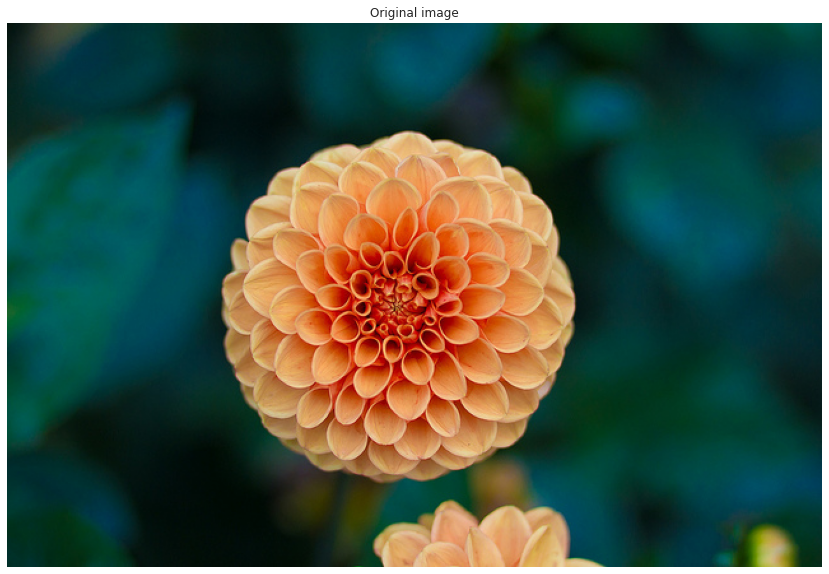

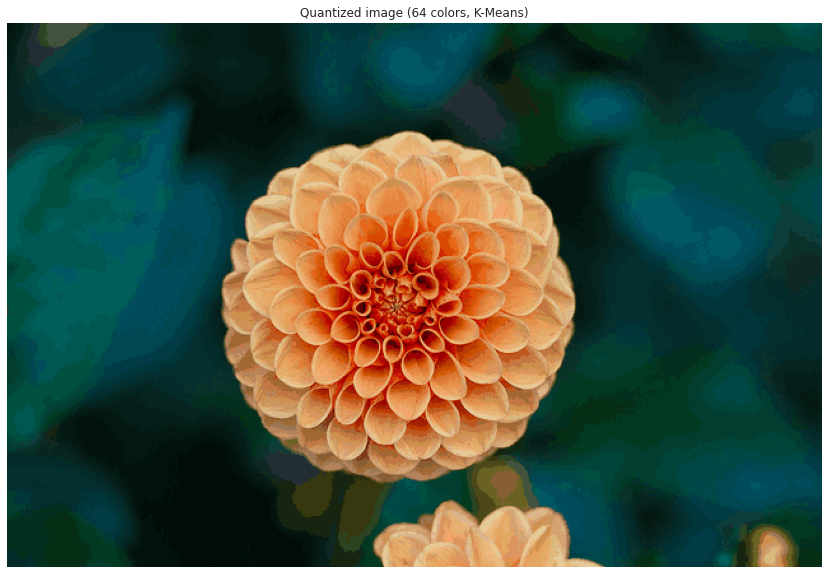

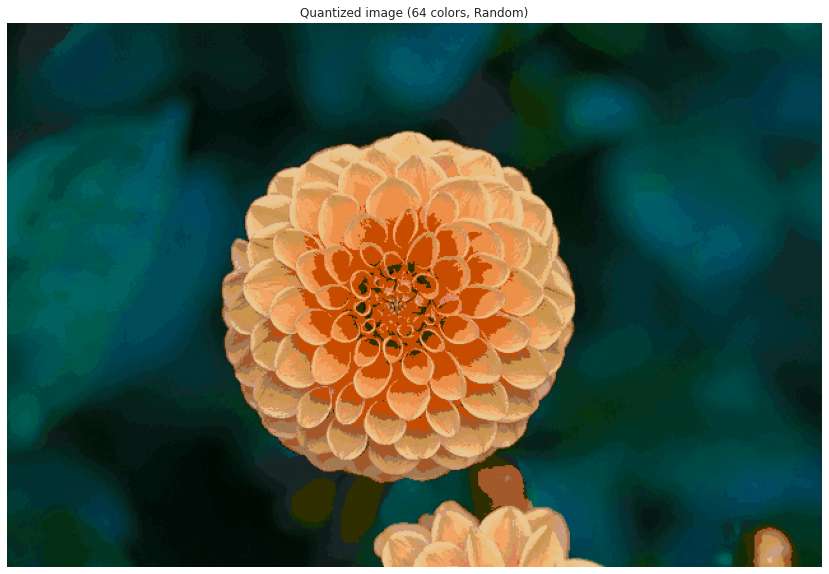

In [125]:
plt.figure(1)
plt.clf()
plt.axis("off")
plt.title("Original image")
plt.imshow(flower)

plt.figure(2)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, K-Means)")
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

plt.figure(3)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, Random)")
plt.imshow(recreate_image(codebook_random, labels_random, w, h))
plt.show()